In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
df = pd.read_csv("boat_data.csv")
df.isna().any()

Price                          False
Boat Type                      False
Manufacturer                    True
Type                            True
Year Built                     False
Length                          True
Width                           True
Material                        True
Location                        True
Number of views last 7 days    False
dtype: bool

In [4]:
temp = df["Price"].str.split(" ",expand =True)
temp

,0,1
0,CHF,3337
1,EUR,3490
2,CHF,3770
3,DKK,25900
4,EUR,3399
...,...,...
9883,CHF,4900
9884,EUR,4516
9885,EUR,4499
9886,EUR,4300


In [6]:
df["currency"]=temp[0]
df["price"]=temp[1]
df=df.drop("Price",axis=1)
df

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399
...,...,...,...,...,...,...,...,...,...,...,...
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,CHF,4900
9884,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94,EUR,4516
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,EUR,4499
9886,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266,EUR,4300


In [10]:
df=df.rename(columns={"Number of views last 7 days":"views"})
df

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,views,currency,price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399
...,...,...,...,...,...,...,...,...,...,...,...
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,CHF,4900
9884,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94,EUR,4516
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,EUR,4499
9886,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266,EUR,4300


In [11]:
df = df.replace(0,np.NaN)
df.isna().any()

Boat Type       False
Manufacturer     True
Type             True
Year Built       True
Length           True
Width            True
Material         True
Location         True
views           False
currency        False
price           False
dtype: bool

In [12]:
df_clean = df.dropna(subset=["Year Built","Length","Width"])
df_clean

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,views,currency,price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017.0,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337
1,Center console boat,Terhi power boats,new boat from stock,2020.0,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
3,Sport Boat,Pioner power boats,new boat from stock,2020.0,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900
4,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399
6,Catamaran,NaN,"Used boat,Unleaded",1999.0,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,CHF,3600
...,...,...,...,...,...,...,...,...,...,...,...
9882,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984.0,6.00,1.62,Plastic,Switzerland Â» Bielersee Â» Gerolfingen,288,CHF,4950
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987.0,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,CHF,4900
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020.0,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,EUR,4499
9886,Pontoon Boat,Whaly power boats,new boat from stock,2018.0,4.37,1.89,NaN,Italy Â» Dormelletto,266,EUR,4300


In [14]:
df["currency"].unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [25]:
prices_in_eur=[]
for ind,row in df_clean.iterrows():
    if row["currency"] == "CHF":
        prices_in_eur.append(int(row["price"])*0.989)
    elif row["currency"] == "DKK":
        prices_in_eur.append(int(row["price"])*0.134)
    elif row["currency"] == "Â£":
        prices_in_eur.append(int(row["price"])*1.160)
    else:
        prices_in_eur.append(int(row["price"]))
prices_in_eur

[3300.293,
 3490,
 3470.6000000000004,
 3399,
 3560.4,
 3333,
 3300,
 3461.5,
 3500,
 4549.4,
 4450.5,
 4020.0000000000005,
 4000,
 4000,
 3999,
 3930,
 3900,
 3900,
 4153.8,
 3985.67,
 3956.0,
 3931.275,
 3906.55,
 3857.1,
 3758.2,
 3758.2,
 3758.2,
 3500,
 3500,
 3500,
 5997.2,
 5500,
 5500,
 5500,
 5835.1,
 5450,
 5399,
 5637.3,
 5250,
 5200,
 5439.5,
 5439.5,
 7120.8,
 6633.0,
 6590,
 6500,
 6500,
 6500,
 6500,
 6500,
 6500,
 6490,
 6923.0,
 6923.0,
 6923.0,
 7800,
 8208.7,
 8119.999999999999,
 7640,
 8065.295,
 7500,
 7500,
 7500,
 7500,
 7500,
 7500,
 7500,
 7500,
 7500,
 8790,
 9296.6,
 8600,
 8600,
 9163.085,
 9098.8,
 8500,
 8500,
 8500,
 8500,
 8500,
 8500,
 8500,
 8500,
 8500,
 10384.5,
 9750,
 10384.5,
 9650,
 10285.6,
 9599,
 9575,
 9553,
 9500,
 9500,
 9500,
 9500,
 9500,
 10879.0,
 10879.0,
 10879.0,
 10115,
 10780.1,
 10780.1,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 11000,
 11000,
 11000,
 11000,
 11000,
 11000,
 11000,
 11000,
 11000,
 

In [26]:
prices_in_eur = np.array(prices_in_eur)

In [27]:
df_clean["prices_in_eur"] = prices_in_eur

<ipython-input-27-95c90afe62fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["prices_in_eur"] = prices_in_eur


In [49]:
df_clean.head(20)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,views,currency,price,prices_in_eur,Area
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017.0,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3300.293,7.6000
1,Center console boat,Terhi power boats,new boat from stock,2020.0,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3490.000,6.0000
3,Sport Boat,Pioner power boats,new boat from stock,2020.0,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900,3470.600,3.0000
4,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3399.000,5.1830
6,Catamaran,NaN,"Used boat,Unleaded",1999.0,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,CHF,3600,3560.400,14.7560
8,Fishing Boat,Crescent power boats,new boat from stock,2019.0,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45,EUR,3333,3333.000,4.9868
9,Pontoon Boat,Whaly power boats,new boat from stock,2018.0,4.35,1.73,NaN,Italy Â» Dormelletto,180,EUR,3300,3300.000,7.5255
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987.0,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3500,3461.500,7.6125
12,Sport Boat,GS Nautica power boats,Used boat,2004.0,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,EUR,3500,3500.000,9.4000
13,Runabout,Kimple power boats,new boat from stock,2020.0,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113,CHF,4600,4549.400,7.2600


In [29]:
df_clean.groupby(["Manufacturer"])["views"].sum().nlargest(10)

Manufacturer
BÃ©nÃ©teau power boats    54485
Sunseeker power boats     50685
Jeanneau power boats      47354
Sea Ray power boats       42254
Princess power boats      38640
Bavaria power boats       34790
Bayliner power boats      33817
Cranchi power boats       32352
Azimut power boats        24339
Fairline power boats      22612
Name: views, dtype: int64

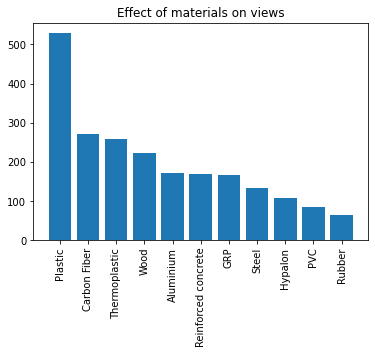

In [101]:
material = df_clean.groupby(["Material"]).agg({"views":"mean"}).sort_values("views",ascending=False)
plt.bar(material.index,material["views"])
plt.xticks(rotation=90)
plt.title("Effect of materials on views")
plt.show()

In [117]:
type = df_clean.groupby(["Type"]).agg({"views":"mean"}).sort_values("views",ascending=False)
type =type.rename(columns={"views":"Average views"})
type.head(10)

,Average views
Type,
"new boat from stock,Hybrid",384.000000
"Used boat,Unleaded",241.393811
"Display Model,Diesel",238.944444
Display Model,226.875000
"Used boat,Propane",224.000000
"Used boat,Gas",190.900000
"Display Model,Unleaded",188.916667
"Used boat,Electric",185.916667
"new boat on order,Diesel",178.271186


In [36]:
!pip install seaborn
import seaborn as sns

In [39]:
area = []
for ind,row in df_clean.iterrows():
    area.append(row["Length"]*row["Width"])
area = np.array(area)
df_clean["Area"] = area

<ipython-input-39-04c43cb49171>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Area"] = area


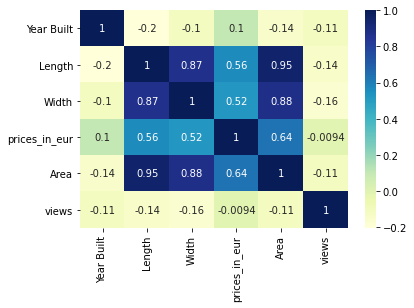

In [40]:
columns = ["Year Built","Length","Width","prices_in_eur","Area","views"]
dataplot = sns.heatmap(df_clean[columns].corr(),cmap="YlGnBu",annot=True)

In [88]:
df_clean.groupby(["Boat Type"])["views"].sum().nlargest(10)

Boat Type
Motor Yacht            338809
Sport Boat             228577
Flybridge              125973
Cabin Boat             122204
Trawler                 72711
Pilothouse              67866
Hardtop                 64679
Bowrider                43165
Center console boat     34416
Fishing Boat            27807
Name: views, dtype: int64

In [82]:
temp_boat = df_clean["Boat Type"].str.split(",",expand=True)
temp_boat

,0,1,2
0,Motor Yacht,None,None
1,Center console boat,None,None
3,Sport Boat,None,None
4,Fishing Boat,None,None
6,Catamaran,None,None
...,...,...,...
9882,Fishing Boat,None,None
9883,Sport Boat,None,None
9885,Sport Boat,None,None
9886,Pontoon Boat,None,None


In [100]:
year = df_clean.groupby(["Year Built"]).agg({"Year Built":"count"})


,Year Built
Year Built,
1885.0,1
1889.0,1
1895.0,1
1897.0,1
1898.0,1
...,...
2017.0,311
2018.0,349
2019.0,660


In [104]:
luxury_boats = ["Motor Yacht","Sport Boat","Flybridge","Cabin Boat"]
ratio = df_clean[df["Boat Type"].isin(luxury_boats)]

<ipython-input-104-3fe5ba20f2fc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratio = df_clean[df["Boat Type"].isin(luxury_boats)]


In [110]:
true = len(ratio)/len(df_clean["Boat Type"])
luxury_market_share = round(true*100,2)
luxury_market_share

59.74

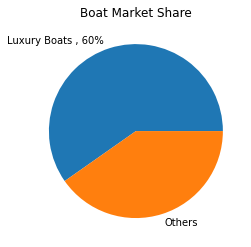

In [113]:
y = np.array([luxury_market_share,100-luxury_market_share])
labels=["Luxury Boats , 60% ","Others"]
plt.pie(y,labels=labels)
plt.title("Boat Market Share")
plt.show()

In [3]:
plt.hist(random.guass(0,50))
plt.show()

NameError: name 'plt' is not defined